In [15]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def gauss_legendre_simple(f, a, b, nodes, weights):
    scaled_nodes = 0.5 * (b - a) * nodes + 0.5 * (a + b)
    f_values = f(scaled_nodes)
    return 0.5 * (b - a) * np.dot(weights, f_values)

In [23]:
import numpy as np
from scipy.special import roots_legendre

# Définition de la fonction à intégrer
def f(x):
    return x**2  # Fonction test : x²

# Intervalle d'intégration
a = 0
b = 2

# Calcul de l'intégrale exacte
exact_integral = (b**3 - a**3) / 3  # Résultat exact : 8/3 ≈ 2.6667

# Paramètres de la quadrature
n = 2  # Nombre de points (doit être suffisant pour x²)
nodes, weights = roots_legendre(n)  # Récupère les points et poids

# Appel de la fonction
approx = gauss_legendre_simple(f, a, b, nodes, weights)

# Affichage des résultats
print(f"Intégrale exacte  : {exact_integral:.6f}")
print(f"Approximation GL  : {approx:.6f}")
print(f"Erreur absolue    : {np.abs(approx - exact_integral):.2e}")

Intégrale exacte  : 2.666667
Approximation GL  : 2.666667
Erreur absolue    : 0.00e+00


In [ ]:
def f(x):
    return np.sin(x)

a = 0
b = np.pi
exact_integral = -np.cos(b) + np.cos(a)  # Résultat exact : 2.0

# Approximation avec n=3 (meilleure précision)
nodes, weights = roots_legendre(3)
approx = gauss_legendre_simple(f, a, b, nodes, weights)

print(f"\nIntégrale exacte  : {exact_integral:.6f}")
print(f"Approximation GL  : {approx:.6f}")
print(f"Erreur absolue    : {np.abs(approx - exact_integral):.2e}")




Intégrale exacte  : 2.000000
Approximation GL  : 2.001389
Erreur absolue    : 1.39e-03


In [18]:
def gauss_legendre(f, n, M, a, b):
    from scipy.special import roots_legendre
    nodes, weights = roots_legendre(n)
    h = (b - a) / M
    total = 0.0
    for j in range(M):
        aj = a + j * h
        bj = aj + h
        total += gauss_legendre_simple(f, aj, bj, nodes, weights)
    return total

In [19]:
def gauss_legendre_vectorized(f, n, M, a, b):
    from scipy.special import roots_legendre
    nodes, weights = roots_legendre(n)
    h = (b - a) / M
    intervals = np.linspace(a, b, M + 1)
    all_nodes = 0.5 * h * nodes.reshape(1, -1) + (intervals[:-1] + 0.5 * h).reshape(-1, 1)
    f_values = f(all_nodes.ravel())
    contributions = 0.5 * h * np.dot(f_values.reshape(M, n), weights)
    return np.sum(contributions)

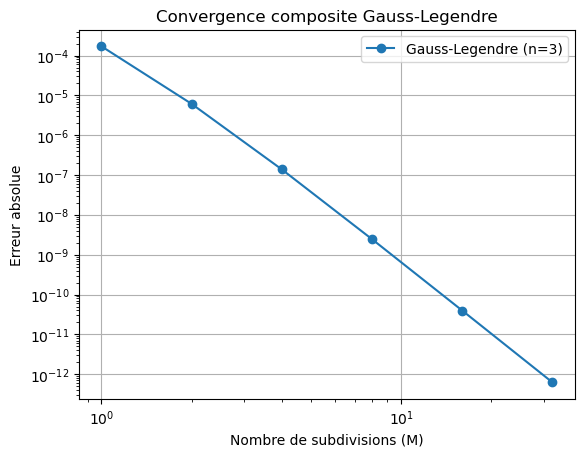

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

def test_q10():
    # Fonction et intervalle
    def f(x): return 1/x
    a, b = 2, 5
    exact = np.log(5) - np.log(2)
    
    # Paramètres de test
    M_values = np.array([1, 2, 4, 8, 16, 32])
    n = 3  # Nombre de points de Gauss
    errors = []
    
    for M in M_values:
        approx = gauss_legendre(f, n, M, a, b)
        errors.append(np.abs(approx - exact))
    
    # Visualisation
    plt.figure()
    plt.loglog(M_values, errors, 'o-', label=f'Gauss-Legendre (n={n})')
    plt.xlabel('Nombre de subdivisions (M)')
    plt.ylabel('Erreur absolue')
    plt.title('Convergence composite Gauss-Legendre')
    plt.grid(True)
    plt.legend()
    plt.show()

test_q10()

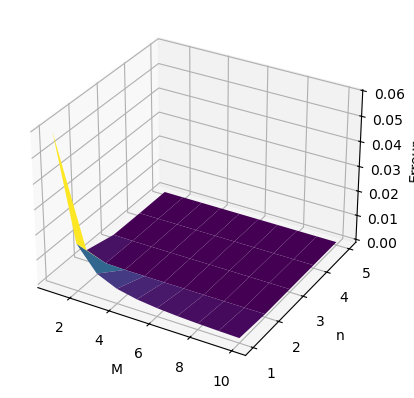

In [28]:
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

def exact_integral():
    return np.log(5) - np.log(2)

def plot_error():
    M_values = np.arange(1, 11)
    n_values = np.arange(1, 6)
    errors = np.zeros((len(n_values), len(M_values)))
    
    for i, n in enumerate(n_values):
        nodes, weights = roots_legendre(n)
        for j, M in enumerate(M_values):
            def integrand(x):
                return 1 / x
            approx = gauss_legendre(integrand, n, M, 2, 5)
            errors[i, j] = np.abs(approx - exact_integral())
    
    X, Y = np.meshgrid(M_values, n_values)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, errors, cmap='viridis')
    ax.set_xlabel('M')
    ax.set_ylabel('n')
    ax.set_zlabel('Erreur')
    plt.show()

plot_error()

In [26]:
import time

def test_q11():
    # Fonction complexe
    def f(x): return np.exp(-x**2)
    a, b = -3, 3
    exact = 1.7724538509055159  # √π
    
    # Paramètres
    M = 1000
    n = 4
    
    # Test de performance
    start = time.time()
    result_loop = gauss_legendre(f, n, M, a, b)
    time_loop = time.time() - start
    
    start = time.time()
    result_vec = gauss_legendre_vectorized(f, n, M, a, b)
    time_vec = time.time() - start
    
    # Affichage
    print(f"Temps boucle : {time_loop:.4f} sec")
    print(f"Temps vectorisé : {time_vec:.4f} sec")
    print(f"Différence résultats : {np.abs(result_loop - result_vec):.2e}")

test_q11()

Temps boucle : 0.0083 sec
Temps vectorisé : 0.0002 sec
Différence résultats : 3.55e-15


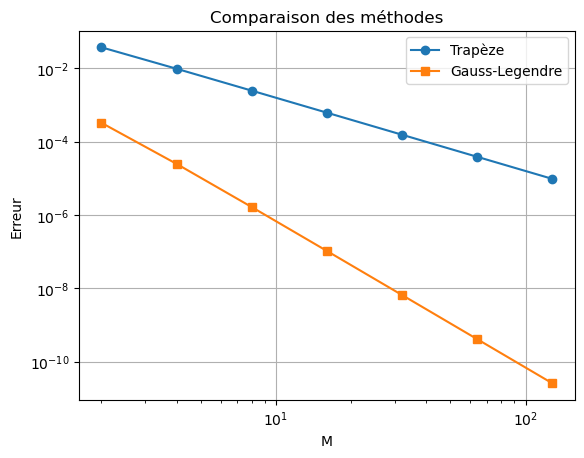

In [31]:
def trapezoidal(f, a, b, M):
    h = (b - a) / M
    x = np.linspace(a, b, M + 1)
    return h * (0.5 * f(a) + 0.5 * f(b) + np.sum(f(x[1:-1])))

# Comparaison
def compare_methods():
    M_values = [2**k for k in range(1, 8)]
    errors_trap = []
    errors_gl = []
    exact = exact_integral()
    
    for M in M_values:
        # Trapèze
        approx_trap = trapezoidal(lambda x: 1/x, 2, 5, M)
        errors_trap.append(np.abs(approx_trap - exact))
        
        # Gauss-Legendre (n=2, M subdivisions)
        approx_gl = gauss_legendre(lambda x: 1/x, 2, M, 2, 5)
        errors_gl.append(np.abs(approx_gl - exact))
    
    plt.loglog(M_values, errors_trap, 'o-', label='Trapèze')
    plt.loglog(M_values, errors_gl, 's-', label='Gauss-Legendre')
    plt.xlabel('M')
    plt.ylabel('Erreur')
    plt.title('Comparaison des méthodes')
    plt.grid(True)
    plt.legend()
    plt.show()

compare_methods()

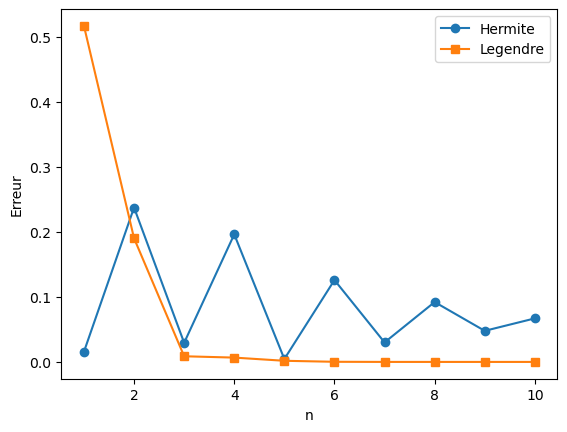

In [22]:
from scipy.stats import norm
from scipy.special import roots_legendre, roots_hermite

def gauss_hermite_cdf(a, n):
    nodes, weights = roots_hermite(n)
    f = np.where(nodes <= a, np.exp(nodes**2 / 2), 0.0)
    integral = np.dot(weights, f)
    return integral / np.sqrt(2 * np.pi)

def gauss_legendre_cdf(a, n, K=5):
    nodes, weights = roots_legendre(n)
    # Truncation à [-K, a]
    scaled_nodes = 0.5 * (a + K) * nodes + 0.5 * (a - K)
    f = norm.pdf(scaled_nodes) * (0.5 * (a + K))
    integral = np.dot(weights, f)
    return integral + norm.cdf(-K)

def evaluate_cdf(a, n_max=10):
    exact = norm.cdf(a)
    hermite_errors = []
    legendre_errors = []
    
    for n in range(1, n_max + 1):
        approx_hermite = gauss_hermite_cdf(a, n)
        hermite_errors.append(np.abs(approx_hermite - exact))
        
        approx_legendre = gauss_legendre_cdf(a, n)
        legendre_errors.append(np.abs(approx_legendre - exact))
    
    plt.plot(range(1, n_max+1), hermite_errors, 'o-', label='Hermite')
    plt.plot(range(1, n_max+1), legendre_errors, 's-', label='Legendre')
    plt.xlabel('n')
    plt.ylabel('Erreur')
    plt.legend()
    plt.show()

evaluate_cdf(0.5)

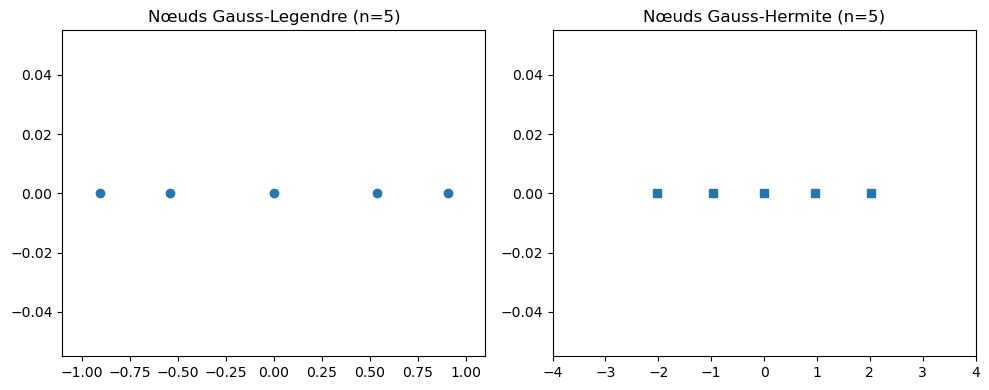

In [32]:
def plot_quadrature_nodes():
    from scipy.special import roots_legendre, roots_hermite

    n = 5
    nodes_leg, _ = roots_legendre(n)
    nodes_herm, _ = roots_hermite(n)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(nodes_leg, np.zeros(n), 'o', label='Legendre')
    plt.title(f'Nœuds Gauss-Legendre (n={n})')
    plt.xlim(-1.1, 1.1)

    plt.subplot(1, 2, 2)
    plt.plot(nodes_herm, np.zeros(n), 's', label='Hermite')
    plt.title(f'Nœuds Gauss-Hermite (n={n})')
    plt.xlim(-4, 4)

    plt.tight_layout()
    plt.show()

plot_quadrature_nodes()

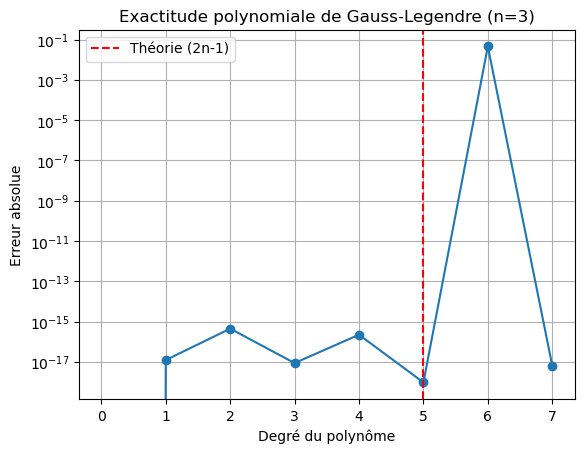

In [33]:
def test_polynomial_exactness():
    max_degree = 7
    n = 3  # Points de Gauss-Legendre
    nodes, weights = roots_legendre(n)
    
    errors = []
    for degree in range(max_degree + 1):
        f = lambda x: x**degree
        exact = (1**(degree + 1) - (-1)**(degree + 1)) / (degree + 1)
        approx = gauss_legendre_simple(f, -1, 1, nodes, weights)
        errors.append(np.abs(approx - exact))
    
    plt.figure()
    plt.semilogy(range(max_degree +1), errors, 'o-')
    plt.axvline(2*n -1, color='r', linestyle='--', label='Théorie (2n-1)')
    plt.xlabel('Degré du polynôme')
    plt.ylabel('Erreur absolue')
    plt.title('Exactitude polynomiale de Gauss-Legendre (n=3)')
    plt.legend()
    plt.grid(True)
    plt.show()

test_polynomial_exactness()

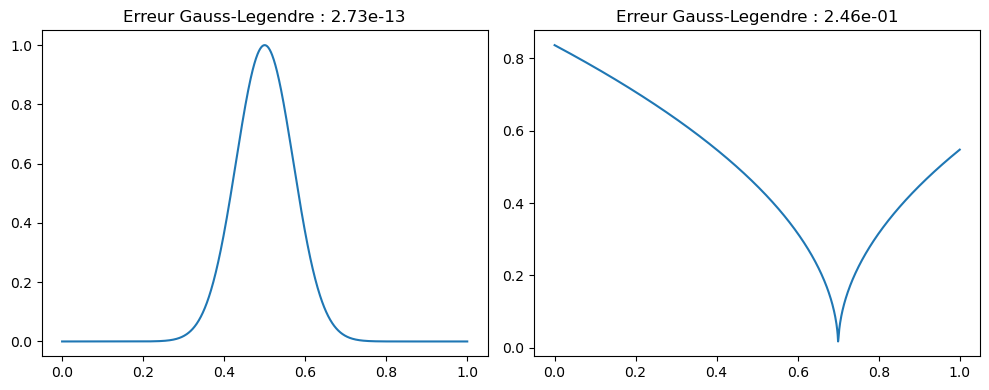

In [34]:
def test_pathological_functions():
    a, b = 0, 1
    n = 5
    M = 20
    
    # Fonction avec pic
    def f1(x): return np.exp(-100*(x-0.5)**2)
    # Fonction non-lisse
    def f2(x): return np.abs(x - 0.7)**0.5
    
    # Calcul des erreurs
    exact1 = 0.1772453850905516  # Approximation numérique
    exact2 = 0.254198  # ∫₀¹ |x−0.7|^0.5 dx
    
    approx_gl1 = gauss_legendre(f1, n, M, a, b)
    approx_gl2 = gauss_legendre(f2, n, M, a, b)
    
    # Visualisation
    x = np.linspace(a, b, 1000)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, f1(x), label='Fonction avec pic')
    plt.title(f'Erreur Gauss-Legendre : {np.abs(approx_gl1 - exact1):.2e}')
    
    plt.subplot(1, 2, 2)
    plt.plot(x, f2(x), label='Fonction non-lisse')
    plt.title(f'Erreur Gauss-Legendre : {np.abs(approx_gl2 - exact2):.2e}')
    
    plt.tight_layout()
    plt.show()

test_pathological_functions()